In [12]:
## Get dependencies ##

import numpy as np
import string
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from UnFaIR import *
import scipy as sp
import pickle

In [13]:
s='85'

RCP_forc = pd.read_csv('./Conc_fit_data/RCP'+s+'_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

otherforc = RCP_forc.TOTAL_INCLVOLCANIC_RF.values - RCP_forc.CO2CH4N2O_RF.values

RCP_E = pd.DataFrame(data = np.array([pd.read_csv('./RCP_data/RCP'+s+'_EMISSIONS.csv',skiprows=36,index_col=0)[['OtherCO2','FossilCO2']].sum(axis=1).values,pd.read_csv('./RCP_data/RCP'+s+'_EMISSIONS.csv',skiprows=36,index_col=0)['CH4'].values,pd.read_csv('./RCP_data/RCP'+s+'_EMISSIONS.csv',skiprows=36,index_col=0)['N2O'].values]).T,columns=['CO2','CH4','N2O'],index = pd.read_csv('./RCP_data/RCP'+s+'_EMISSIONS.csv',skiprows=36,index_col=0).index)

Best_estimate_ems = pd.read_csv('Best_estimate_emissions_for_UnFaIR.csv',index_col=0)

In [14]:
BE_fut_rcp = Best_estimate_ems.append(RCP_E.loc[2013:]+ Best_estimate_ems.loc[2012] - RCP_E.loc[2012])

base = UnFaIR(BE_fut_rcp,otherforc)

In [15]:
## param sensitivity test

sens_df = pd.DataFrame(index=BE_fut_rcp.index)
life_df = pd.DataFrame(index=BE_fut_rcp.index)

for param in ['r0','rT','rA']:
    
    base_params = default_gas_params()
    base_params.loc[param,'CH4'] = base_params.loc[param,'CH4']*1.1
    model_run = UnFaIR(BE_fut_rcp,otherforc,gas_params=base_params)
    sens_df['CH4'+param] = model_run['C']['CH4'] / base['C']['CH4']
    life_df['CH4'+param] = model_run['alpha']['CH4'] / base['alpha']['CH4']
    
for param in ['r0','rA']:
    
    base_params = default_gas_params()
    base_params.loc[param,'N2O'] = base_params.loc[param,'N2O']*1.1
    model_run = UnFaIR(BE_fut_rcp,otherforc,gas_params=base_params)
    sens_df['N2O'+param] = model_run['C']['N2O'] / base['C']['N2O']
    life_df['N2O'+param] = model_run['alpha']['N2O'] / base['alpha']['N2O']
    
for param in ['r0','rC','rT']:
    
    base_params = default_gas_params()
    base_params.loc[param,'CO2'] = base_params.loc[param,'CO2']*1.1
    model_run = UnFaIR(BE_fut_rcp,otherforc,gas_params=base_params)
    sens_df['CO2'+param] = model_run['C']['CO2'] / base['C']['CO2']
    life_df['CO2'+param] = model_run['alpha']['CO2'] / base['alpha']['CO2']

In [16]:
round((sens_df.loc[[2010,2100,2500]]-1)*100,2)

,CH4r0,CH4rT,CH4rA,N2Or0,N2OrA,CO2r0,CO2rC,CO2rT
2010,8.35,-0.19,0.68,1.15,-0.00,1.65,0.25,0.16
2100,13.56,-1.29,3.34,4.12,-0.02,2.91,1.41,1.20
2500,16.28,-3.59,3.83,11.57,-0.11,1.66,1.27,1.16


In [17]:
# effect of removing the parameter

sens_df_0 = pd.DataFrame(index=BE_fut_rcp.index)
life_df_0 = pd.DataFrame(index=BE_fut_rcp.index)

for param in ['r0','rT','rA']:
    
    base_params = default_gas_params()
    base_params.loc[param,'CH4'] = base_params.loc[param,'CH4']*0
    model_run = UnFaIR(BE_fut_rcp,otherforc,gas_params=base_params)
    sens_df_0['CH4'+param] = model_run['C']['CH4'] / base['C']['CH4']
    life_df_0['CH4'+param] = model_run['alpha']['CH4'] / base['alpha']['CH4']
    
for param in ['r0','rA']:
    
    base_params = default_gas_params()
    base_params.loc[param,'N2O'] = base_params.loc[param,'N2O']*0
    model_run = UnFaIR(BE_fut_rcp,otherforc,gas_params=base_params)
    sens_df_0['N2O'+param] = model_run['C']['N2O'] / base['C']['N2O']
    life_df_0['N2O'+param] = model_run['alpha']['N2O'] / base['alpha']['N2O']
    
for param in ['r0','rC','rT']:
    
    base_params = default_gas_params()
    base_params.loc[param,'CO2'] = base_params.loc[param,'CO2']*0
    model_run = UnFaIR(BE_fut_rcp,otherforc,gas_params=base_params)
    sens_df_0['CO2'+param] = model_run['C']['CO2'] / base['C']['CO2']
    life_df_0['CO2'+param] = model_run['alpha']['CO2'] / base['alpha']['CO2']


/home/nleach/Documents/UnFaIR/5eqSCM/Nick_UnFaIR/UnFaIR.py:81: RuntimeWarning: divide by zero encountered in true_divide
  R = E[:,np.newaxis] * emis2conc[:,np.newaxis] * a * alpha * tau * ( 1. - np.exp( -1./(alpha*tau) ) ) + R * np.exp( -1./(alpha * tau) )


In [18]:
## Change in CH4 lifetime over 2010-2100 period

print('CH4 lifetime change over 2010-2100 period (%)')
print(round((base['alpha']['CH4'].loc[2100] / (base['alpha']['CH4']).loc[2010]-1)*100,1))
print('\n')
print('N2O lifetime change over 2010-2100 period (%)')
print(round((base['alpha']['N2O'].loc[2100] / (base['alpha']['N2O']).loc[2010]-1)*100,1))

CH4 lifetime change over 2010-2100 period (%)
12.5


N2O lifetime change over 2010-2100 period (%)
-1.3


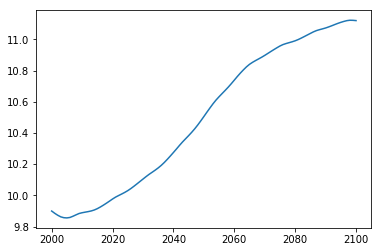

In [19]:
(base['alpha']['CH4']*default_gas_params().loc['tau1','CH4']).loc[2000:2100].plot()